In [1]:
import numpy as np
import pandas as pd
from pyscripts.config import path2
from pyscripts.datasets import Metadata
metadata = Metadata()

In [2]:
habitablity_scores = pd.read_pickle(path2.data/'prokatlas'/'summary.pkl.bz2')
idp_summary = pd.read_pickle(path2.data/'iupred2a'/'summary.pkl.bz2')
idp_summary = idp_summary.swaplevel(0,1,axis=1).swaplevel(1,2,axis=1).sort_index(axis=1)

In [3]:
phylum = metadata.acc.set_index('refseq')['gtdbrep'].map(
    metadata.tax_inuse['GTDB taxonomy'].str.split(';', expand=True)[1].rename('phylum')
)
phylum_counts = phylum.value_counts()
phylum = phylum.where(phylum.isin(idx := phylum_counts[phylum_counts >= 40].index), 'others')


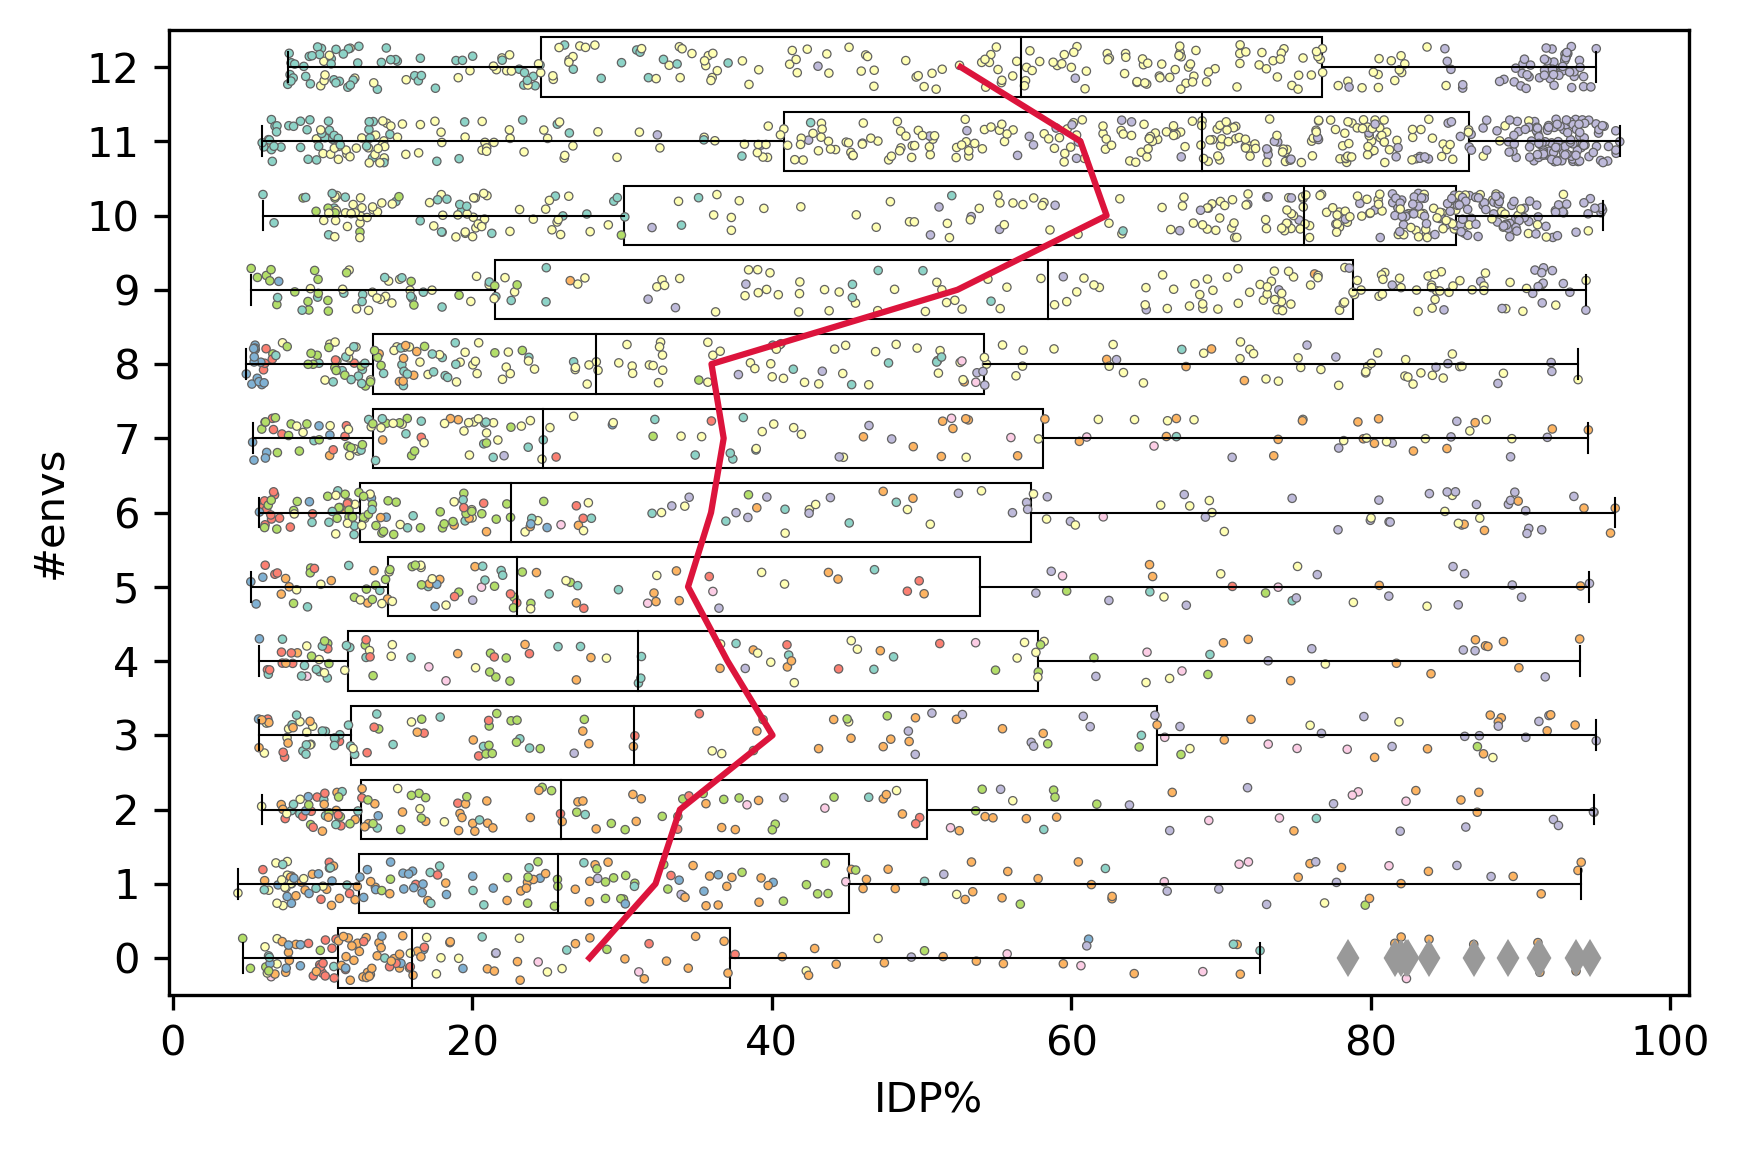

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

pltdat = pd.concat([
    (habitablity_scores > 0).sum(),
    (idp_summary[30, 0.5] / idp_summary[30, 0]).loc[[4,16]].mean() * 100,
    phylum
], axis=1, keys=['#envs', 'IDP%', 'phylum'])

mm = 1 / 25.4
with plt.rc_context():
    fig, ax = plt.subplots(figsize=(150*mm, 100*mm), dpi=300)
    conf=dict(zorder=1, c='k')
    sns.boxplot(
        x='IDP%', y='#envs', data=pltdat,
        color='w', orient='h', linewidth=0.5, ax=ax, 
        capprops=conf, whiskerprops=conf, flierprops=conf, medianprops=conf, 
        boxprops=dict(zorder=0, ec='k'),
    )
    sns.stripplot(
        x='IDP%', y='#envs', hue='phylum', data=pltdat, 
        jitter=0.3, s=2, orient='h', linewidth=0.3, palette='Set3', ax=ax, zorder=1
    )
    sns.lineplot(
        x='IDP%', y='#envs', data=pltdat.groupby('#envs').mean(), 
        markers=True, color='crimson', sort=False, ax=ax, zorder=2
    )
    ax.legend().remove()
    ax.set_ylim(-0.5, 12.5)
    fig.tight_layout()

- Reporduced micorbial habitability analysis.
- The figure will be revised later.